Name: Nikhil Supekar <br>
NetID: ns4486

In [129]:
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
INPUT_FILE_PATH = '../data/ridge_regression/ridge_regression_dataset.csv'

$$
\begin{aligned}
E[\| x \|^2] & = E[\sum_{i=1}^{n} x_i^2] \\
& = \sum_{i=1}^{n} E[x_i^2] \\
& = \sum_{i=1}^{n} \sum_{j=1, y_j\in Range(x_i)}^{5} y_j^2 p(y_j) \\
& = \sum_{i=1}^{n} (-2)^2 \frac{1}{5} + (-1)^2 \frac{1}{5} + (-0)^2 \frac{1}{5} + (1)^2 \frac{1}{5} + (2)^2 \frac{1}{5} \\
& = \sum_{i=1}^{n} 2 \\
& = 2n
\end{aligned}
$$

$$
\begin{aligned}
E[\|x\|_{\infty}] & = E[max_{i} |x_i|] \\
& = E[|x_{max}|] \\
& = |-2| \frac{1}{5} + |-1| \frac{1}{5} + |0| \frac{1}{5} + |1| \frac{1}{5} + |2| \frac{1}{5} \\
& = \frac{6}{5}
\end{aligned}
$$

$$
\begin{aligned}
Cov(\overrightarrow{x}) & = [Cov(x_i, x_j)]_{ij} \\
& = [0] \text{if}\ i \neq j \text{(since $x_i$ are iid)}\\
&   [Var(x_i) \text{otherwise}] \\
& = [0] \text{if}\ i \neq j \\
&   2 \\
& = 2 I_n
\end{aligned}
$$

$$
\begin{aligned}
E[(a - y)^2]& = E[(a - E[y] + E[y] - y)^2] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + E[2(a - E[y])(E[y] - y)] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[(a - E[y])(E[y] - y)] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[(a - E[y])(E[y] - y) \mid y]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[a E[y] - a y - E[y]^2 + E[y] y] \mid y]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[a E[y] \mid y] - E[a y \mid y] - E[E[y]^2 \mid y] + E[E[y] y \mid y]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[E[y \mid y] E[a \mid y] - y E[a \mid y] - E[y]^2 + E[y]^2]] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[y E[a \mid y] - y E[a \mid y] + 0] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] + 2 E[0] \\
& = E[(a - E[y])^2] + E[(E[y] - y)^2] \\
\end{aligned}
$$

$$
\begin{aligned}
(a - E[y])^2 \geq 0 & \Rightarrow E[(a - E[y])^2] \geq 0 \\
& \Rightarrow E[(a - E[y])^2] + E[(E[y] - y)^2] \geq E[(E[y] - y)^2] \\
& \Rightarrow E[(a - y)^2] \geq E[(E[y] - y)^2] \\
\end{aligned}
$$

$$
\begin{aligned}
E[(a - y)^2] = E[(E[y] - y)^2] & \Leftrightarrow E[(a - E[y])^2] = 0 \\
& \Leftrightarrow a = E[y] \\
\end{aligned}
$$

$$
min_{a}(E[(a - y)^2]) = E[(E[y] - y)^2] \\
argmin_{a}(E[(a - y)^2]) = E[y]\\
$$

$$
\begin{align}
E[(a - y)^2 \mid x] & = E[(a - E[y \mid x] + E[y \mid x] - y)^2 \mid x] \\
& = E[(a - E[y \mid x])^2 + (E[y \mid x] - y)^2 + 2(a - E[y \mid x])(E[y \mid x] - y) \mid x] \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 E[(a - E[y \mid x])(E[y \mid x] - y) \mid x] \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 E[a E[y \mid x] - a y - E[y \mid x]^2 + E[y \mid x] y \mid x] \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (E[a E[y \mid x] \mid x] - E[a y \mid x] - E[E[y \mid x]^2 \mid x] + E[E[y \mid x] y \mid x]) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (E[E[y \mid x] E[a \mid x] - a E[y \mid x] - E[y \mid x]^2 + E[y \mid x]^2]) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] + 2 (0) \\
& = E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] \\
\end{align}
$$

$$
\begin{align}
(a - E[y \mid x])^2 \geq 0 & \Rightarrow E[(a - E[y \mid x])^2 \mid x] \geq 0\\
& \Rightarrow E[(a - E[y \mid x])^2 \mid x] + E[(E[y \mid x] - y)^2 \mid x] \geq E[(E[y \mid x] - y)^2 \mid x]\\
& \Rightarrow E[(a - y)^2 \mid x] \geq E[(E[y \mid x] - y)^2 \mid x] \\
\end{align}
$$

$$
\begin{align}
E[(a - y)^2 \mid x] = E[(E[y \mid x] - y)^2 \mid x] & \Leftrightarrow E[(a - E[y \mid x])^2 \mid x] = 0 \\
& \Leftrightarrow a - E[y \mid x] = 0 \\
& \Leftrightarrow a = E[y \mid x] \\
& \Leftrightarrow f(x) = E[y \mid x] \\
& \Rightarrow f^{*}(x) = E[y \mid x] \\
\end{align}
$$

In [4]:
### Feature normalization
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test - test set, a 2D numpy array of size (num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    num_instances = train.shape[0]
    num_features = train.shape[1]
    
    mean_vec = np.apply_along_axis(np.mean, 0, train)
    std_vec = np.apply_along_axis(np.std, 0, train)
    
    const_feature_indices = np.where(std_vec == 0)
    train = np.delete(train, const_feature_indices, 1)
    test = np.delete(test, const_feature_indices, 1)
    mean_vec = np.delete(mean_vec, const_feature_indices, 0)
    std_vec = np.delete(mean_vec, const_feature_indices, 0)
    
    train_normalized = (train - mean_vec) / std_vec
    test_normalized = (test - mean_vec) / std_vec
    
    return train_normalized, test_normalized

$$
J(\theta) = \frac{1}{m} \|X \theta - y\|^2
$$

$$
\nabla J(\theta) = \frac{2}{m} X^{T}(X \theta - y)
$$

$$
\begin{align}
J(\theta + \eta h) - J(\theta) & = \eta h \nabla J(\theta) \\
& = \frac{2 \eta h}{m} X^{T} (X \theta - y) \\
\end{align}
$$

$$
\begin{align}
\theta_{i+1} & = \theta_{i} - \eta \nabla J(\theta_{i}) \\
& = \theta_{i} - \frac{2 \eta}{m} X^{T} (X \theta - y) \\
\end{align}
$$

In [5]:
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D array of size (num_features)

    Returns:
        loss - the average square loss, scalar
    """
    m = X.shape[0]
    return np.linalg.norm(np.dot(X, theta) - y) / m


In [6]:
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss (as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    m = X.shape[0]
    return np.transpose(X).dot(np.dot(X, theta) - y) * 2 / m

In [7]:
#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
    (e_1 = (1,0,0,...,0), e_2 = (0,1,0,...,0), ..., e_d = (0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
    ( J(theta + epsilon * e_i) - J(theta - epsilon * e_i) ) / (2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    J = compute_square_loss
    
    for i in range(num_features):
        approx_grad[i] = (J(theta + epsilon * np.eye(1, num_features, i)) - J(theta - epsilon * np.eye(1, num_features, i))) / (2 * epsilon)
    
    return np.linalg.norm(approx_grad, true_gradient) <= tolerance

In [8]:
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    true_gradient = gradient_func(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    J = objective_func
    
    for i in range(num_features):
        approx_grad[i] = (J(theta + epsilon * np.eye(1, num_features, i)) - J(theta - epsilon * np.eye(1, num_features, i))) / (2 * epsilon)
    
    return np.linalg.norm(approx_grad, true_gradient) <= tolerance

In [9]:
#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array, (num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    theta = np.zeros(num_features) #Initialize theta
    
    for i in range(1, num_step + 1):
        theta = theta_hist[i - 1, :] - alpha * compute_square_loss_gradient(X, y, theta_hist[i - 1, :])
        theta_hist[i, :] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist

In [10]:

df = pd.read_csv(INPUT_FILE_PATH, delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)

print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))  # Add bias term

Split into Train and Test
Scaling all to [0, 1]


Text(0, 0.5, 'avg loss')

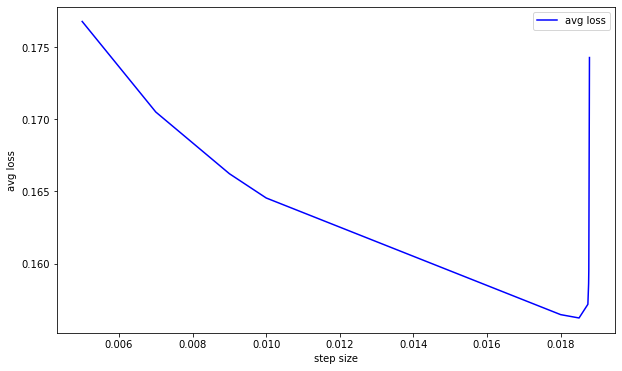

In [98]:
fig, ax = plt.subplots(figsize = (10, 6))

STEP_SIZES = [0.005, 0.007, 0.009, 0.01, 0.018, 0.0185, 0.01874, 0.01876, 0.018765, 0.018783]
avg_loss = []
for alpha in STEP_SIZES:
    theta, loss = batch_grad_descent(X_train, y_train, alpha)
    avg_loss.append(np.mean(loss))
# mean_vec = np.apply_along_axis(np.mean, 0, train).reshape(num_instances, 1)
# std_vec = np.apply_along_axis(np.std, 0, train).reshape(num_instances, 1)
ax.plot(STEP_SIZES, avg_loss, color = 'blue', label = 'avg loss')
ax.legend()
plt.xlabel('step size')
plt.ylabel('avg loss')

$$
J(\theta) = \frac{1}{m} \|X \theta - y\|^2 + \lambda \theta^T \theta
$$

$$
\begin{align}
\nabla J(\theta) & = \frac{2}{m} X^{T}(X \theta - y) + 2 \lambda \theta \\
\end{align}
$$

$$
\begin{align}
\theta_{i+1} & = \theta_{i} - \eta \nabla J(\theta_{i}) \\
& = \theta_{i} - \frac{2 \eta}{m} X^{T} (X \theta - y) - 2 \lambda \eta \theta \\
\end{align}
$$

In [31]:
#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        theta - the parameter vector, 1D numpy array of size (num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size (num_features)
    """
    m = X.shape[0]
    return np.transpose(X).dot(np.dot(X, theta) - y) * 2 / m + 2 * lambda_reg * theta

In [34]:
#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size (num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step (num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    
    for i in range(1, num_step + 1):
        theta_prev = theta_hist[i - 1, :]
        theta = theta_prev - alpha * compute_regularized_square_loss_gradient(X, y, theta_prev, lambda_reg) - 2 * alpha * lambda_reg * theta_prev
        theta_hist[i, :] = theta
        loss_hist[i] = compute_square_loss(X, y, theta)
    
    return theta_hist, loss_hist

The loss function for ridge regression with a bias B can be expressed as follows:
$$
\begin{align}
J(\theta) & = \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta \\
& = \frac{1}{m} ((\theta_1 x_i^{(1)} - y_1)^2 + ... + (\theta_n x_i^{(n)} - y_n)^2 + m \lambda (\theta_1^2 + ... + \theta_n^2))\\
& = \frac{1}{m} ((\theta_1 B - y_1)^2 + m \lambda \theta_1^2 + g(\theta_2, ..., \theta_n)) \\
& = \frac{1}{m} ((B^2 + m \lambda) \theta_1^2 - 2 B y_1 \theta_1 + y_1^2 + g(\theta_2, ..., \theta_n)) \\
\end{align}
$$

Regularization tries to prevent overfitting by adding a penalty to the loss function by adding quadratic terms to optimization. <br>
This ensures that the weights are distributed over the squared $\theta$ terms.<br>
With a high bias term, the co-efficient against $\theta_1$ is already high, so more of the weight distribution will happen on the other $\theta$ terms. <br>
This reduces the effect of regularization on the bias term which can be made as small as possible by increasing B. This works because of the quadratic effect of B on the penalization as seen in the final equation above. <br>
Although the regularization can be made arbitrarily small, theoretically it can never be made zero since there will always be some non-zero weight assigned by the regularization to the bias term.

Text(0, 0.5, 'avg loss')

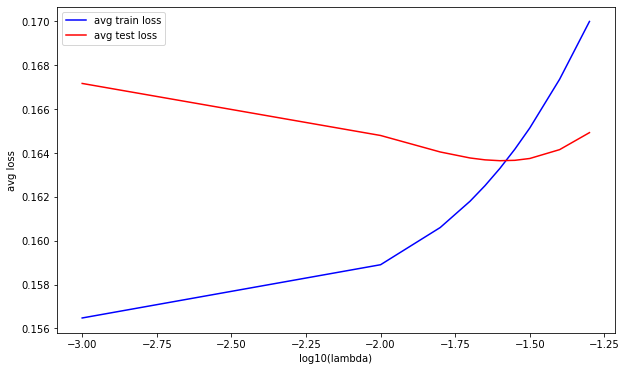

In [99]:
# STEP_SIZES = [0.005, 0.007, 0.009, 0.01, 0.018, 0.0185, 0.01874, 0.01876, 0.018765, 0.018783]

fig, ax = plt.subplots(figsize = (10, 6))

# LAMBDA_LIST = [10**-4, 10**-3, 10**-2, 10**-1.8, 10**-1.6, 10**-1.5, 10**-1.4, 10**-1.3]
LAMBDA_LIST = [10**-3, 10**-2, 10**-1.8, 10**-1.7, 10**-1.65, 10**-1.6, 10**-1.55, 10**-1.5, 10**-1.4, 10**-1.3]
avg_train_loss = []
avg_test_loss = []
alpha = 0.0185
for lambda_reg in LAMBDA_LIST:
    train_theta, train_loss = regularized_grad_descent(X_train, y_train, alpha, lambda_reg)
    avg_train_loss.append(np.mean(train_loss))

    test_losses = []
    for i in range(train_theta.shape[0]):
        test_losses.append(compute_square_loss(X_test, y_test, train_theta[i, :]))
    avg_test_loss.append(np.mean(test_losses))

ax.plot(np.log10(LAMBDA_LIST), avg_train_loss, color = 'blue', label = 'avg train loss')
ax.plot(np.log10(LAMBDA_LIST), avg_test_loss, color = 'red', label = 'avg test loss')
ax.legend()
plt.xlabel('log10(lambda)')
plt.ylabel('avg loss')

In [104]:
train_theta, train_loss = regularized_grad_descent(X_train, y_train, 0.0185, 10**-1.6)
train_theta[-1, :]

array([-0.54109625,  0.35083631,  0.95111792,  1.53703   , -1.10047662,
       -0.49153729, -0.52401462, -0.52401462,  0.43399192,  0.70098683,
        1.47339575, -0.33523244, -0.22077806, -1.49365468,  0.28560362,
        0.63884727,  0.12945723,  0.01567204,  0.09599622,  0.09599622,
        0.09599622,  0.05337566,  0.05337566,  0.05337566,  0.03628443,
        0.03628443,  0.03628443,  0.02761108,  0.02761108,  0.02761108,
        0.02257603,  0.02257603,  0.02257603,  0.11569302,  0.11569302,
        0.11569302,  0.05942523,  0.05942523,  0.05942523,  0.03400609,
        0.03400609,  0.03400609,  0.02038152,  0.02038152,  0.02038152,
        0.01223101,  0.01223101,  0.01223101, -0.17601895])

In practice, $\theta$ should be chosen to minimize the average test loss. However, we should also make sure that the model doesn't overfit and should be kept simple. With increasing number of parameters, the model can become complex which can be determined by the values of $\theta_i$. A simple model will have small $\theta_i$ and a complex (and overfitted) model will have high $\theta_i$ since it is causing high variability. As seen above, this isn't the case with the given data so we can go ahead and select $\theta$ that minimizes average test loss.

$$
\begin{align}
J(\theta) & = \frac{1}{m} \sum_{i = 1}^{m} (h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta \\
& = \frac{1}{m} \left[ \sum_{i = 1}^{m} (h_{\theta}(x_i) - y_i)^2 + m \lambda \theta^T \theta \right] \\
& = \frac{1}{m} \left[ \sum_{i = 1}^{m} (h_{\theta}(x_i) - y_i)^2 + \sum_{i = 1}^{m} \lambda \theta^T \theta \right] \\
& = \frac{1}{m} \sum_{i = 1}^{m} \left[ h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta \right] \\
& = \frac{1}{m} \sum_{i = 1}^{m} f_i(\theta) \\
\end{align}
$$

$$
\begin{align}
f_i(\theta) & = (h_{\theta}(x_i) - y_i)^2 + \lambda \theta^T \theta \\
& = (\theta^T x_i - y_i)^2 + \lambda \theta^T \theta \\
\end{align}
$$

$$
\begin{align}
\nabla f_i(\theta) = 2(\theta^T x_i - y_i) x_i + 2 \lambda \theta \\
\end{align}
$$

$$
\begin{align}
E[\nabla f_i(\theta)] & = \frac{1}{m} \sum_{i = 1}^{m} \nabla f_i(\theta) \\
& = \frac{1}{m} \sum_{i = 1}^{m} \left[ 2(\theta^T x_i - y_i) x_i + 2 \lambda \theta \right] \\
& = \frac{2}{m} \sum_{i = 1}^{m} \left( \theta^T x_i - y_i \right) x_i + \frac{2 \lambda \theta}{m} \sum_{i = 1}^{m} 1 \\
& = \frac{2}{m} X^T (X \theta - y) + 2 \lambda \theta \\
& = \nabla J(\theta) \\
\end{align}
$$

$$
\theta_{t+1} = \theta_{t} - \eta \nabla f_i(\theta_t)
$$

In [105]:
def compute_stochastic_gradient(x_i, y_i, theta, lambda_reg):
    return 2 * (theta.transpose().dot(x_i) - y_i) * x_i + 2 * lambda_reg * theta

In [130]:
#######################################
### Stochastic gradient descent
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size (num_instances, num_features)
        y - the label vector, 1D numpy array of size (num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size (num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch (num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size (num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    def calc_alpha(alpha, t, C = 0.1):
        if isinstance(alpha, float):
            return alpha
        
        if alpha == '1/sqrt(t)':
            return C / math.sqrt(t)
        
        if alpha == '1/t':
            return C / t

    t = 1
    for epoch in range(num_epoch):
        for i in range(num_instances):
            x_i = X[i, :]
            y_i = y[i]
            
            theta = theta - calc_alpha(alpha, t) * compute_stochastic_gradient(x_i, y_i, theta, lambda_reg)
            theta_hist[epoch, i, :] = theta
            loss_hist[epoch, i] = compute_square_loss(X, y, theta)

            t += 1
    
    return theta_hist, loss_hist

In [159]:
num_epoch = 7
EPOCH_LIST = list(range(1, num_epoch))
train_theta, train_loss = stochastic_grad_descent(X_train, y_train, alpha='1/t', lambda_reg=10**-1.6, num_epoch=num_epoch)


Text(0, 0.5, 'avg loss')

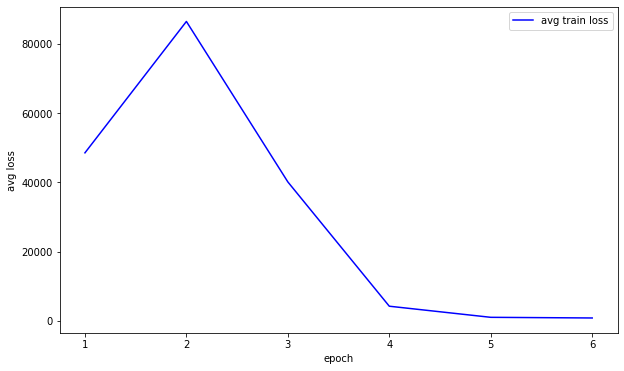

In [160]:
fig, ax = plt.subplots(figsize = (10, 6))
sgd_avg_loss = []

for epoch in EPOCH_LIST:
    sgd_avg_loss.append(np.mean(train_loss[epoch, :]))

ax.plot(EPOCH_LIST, sgd_avg_loss, color = 'blue', label = 'avg train loss')
# ax.plot(np.log10(LAMBDA_LIST), avg_test_loss, color = 'red', label = 'avg test loss')
ax.legend()
plt.xlabel('epoch')
plt.ylabel('avg loss')